### Sample code to peform histogram analysis on the RGB channels of various assay images ###

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import StratifiedKFold, KFold,ShuffleSplit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

In [3]:
def segment_image (image):
    
    image_for_plot= np.copy(image)
    #image = cv2.medianBlur(image,5)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_mean= np.mean(gray)
    print (gray_mean)

    #formula to choose right lower binary threshold, self-estimated formula after observance 
    # T= 0.8I-30
    lower_th= 0.8*gray_mean-30

    ret2,th2 = cv2.threshold(gray,lower_th,255,cv2.THRESH_BINARY)

    kernel = np.ones((5,5),np.uint8)
    th2 = cv2.morphologyEx(th2, cv2.MORPH_CLOSE, kernel)

    # find the contour 
    contours= cv2.findContours(th2,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
    cnts = contours[1] if cv2.__version__.startswith('3') else contours[0]
    rectangles = []
    circles=[]

    for c in cnts:

        if cv2.contourArea(c) < 2000 :
            continue
        x,y,w,h = cv2.boundingRect(c)
        rectangles.append((x,y,w,h))

    rectangles= rectangles[0:2]
    if rectangles[0][0]>rectangles[1][0]:
        rectangles= rectangles[::-1]
    

    print (rectangles)
    img_sample= image_for_plot[rectangles[1][1]:rectangles[1][1]+rectangles[1][3],rectangles[1][0]:rectangles[1][0]+rectangles[1][2]]
    img_sample_downsample= cv2.resize(img_sample,(32,32),interpolation=cv2.INTER_AREA)
    #plt.figure(1,figsize=(20,20))
    #plt.imshow(img_sample[:,:,::-1])   
    return img_sample,img_sample_downsample

In [ ]:
root = "C:/Users/Brinda Khanal/Desktop/All images 2400/"
images = []
filenames= ['IMG_403.jpg','IMG_409.jpg','IMG_418.jpg','IMG_429.jpg','IMG_441.jpg',
            'IMG_452.jpg','IMG_459.jpg','IMG_470.jpg','IMG_476.jpg','IMG_488.jpg' ]
for img_name in filenames:
    print (root+img_name)
    image = cv2.imread(root+img_name)
    img_sample,img_sample_downsample= segment_image(image)
    images.append(img_sample)
    


In [ ]:
def load_RGB_food_color():
    
    # load RGB channel data
    data= pd.read_pickle('C:/Users/Brinda Khanal/Documents/Bidur Git Repo/padColorimetry/Data/new data/downsampled_image_HSV_32_2400_inner_circle.pkl')
    #replace_values= { 1:11, 2 : 11, 3 : 11, 4 : 11, 5 : 12, 6 : 12 , 7 : 12, 8 : 13, 9 : 13, 10 : 13} # fuse the labels
    #replace_values= { 1:11, 2 : 11, 3 : 11, 4 : 11, 5 : 12, 6 : 12 , 7 : 13, 8 : 13, 9 : 14, 10 : 14} # fuse the labels
    #data.replace({'Dilution Factor' : replace_values}, inplace = True)
    
    # encode the label values into integer type
    #lab_enc = preprocessing.LabelEncoder()
    #Label = lab_enc.fit_transform(data['Dilution Factor'])
    Label= data['Dilution Factor'].values
    print(data['Dilution Factor'])
    
    feature_vector = data['Feature Vector']
    features=[]
    for f in feature_vector:
        f = np.split(f, 2,axis=2)[1]
        features.append(f)
    features = np.array(features)
    features = np.reshape(features,(features.shape[0],-1))
    print (features.shape)
    return Label, features


label,image=load_RGB_food_color()
concentration_label =np.arange(1,11)

grouped_images= [image[label==i] for i in concentration_label]
flattened=[np.concatenate(groups) for groups in grouped_images] 

flattened_grouped=[np.reshape(groups, (-1, 128, 3)) for groups in flattened] 
_flattened_= np.reshape(flattened[0], (-1, 32, 3)) 

#print (flattened[0].shape)
plt.figure(1,figsize=(20,20))
plt.imshow(_flattened_[:,:,::-1])
plt.imshow(image)




In [ ]:
def load_RGB_pesticide():
    
    # load RGB channel data
    data= pd.read_pickle('C:/Users/Brinda Khanal/Documents/Bidur Git Repo/padColorimetry/Data/new data/downsampled_image_HSV_32_pesticide_train_inner_circle.pkl')
    #replace_values= { 1:11, 2 : 11, 3 : 11, 4 : 11, 5 : 12, 6 : 12 , 7 : 12, 8 : 13, 9 : 13, 10 : 13} # fuse the labels
    #replace_values= { 1:11, 2 : 11, 3 : 11, 4 : 11, 5 : 12, 6 : 12 , 7 : 13, 8 : 13, 9 : 14, 10 : 14} # fuse the labels
    #data.replace({'Dilution Factor' : replace_values}, inplace = True)
    
    # encode the label values into integer type
    #lab_enc = preprocessing.LabelEncoder()
    #Label = lab_enc.fit_transform(data['Dilution Factor'])
    Label= data['Dilution Factor'].values
    print(data['Dilution Factor'])
    
    feature_vector = data['Feature Vector']
    features=[]
    for f in feature_vector:
        f = np.split(f, 2,axis=2)[1]
        features.append(f)
    features = np.array(features)
    features = np.reshape(features,(features.shape[0],-1))
    print (features.shape)
    return Label, features


label,image=load_RGB_pesticide()
concentration_label =np.arange(1,11)

grouped_images= [image[label==i] for i in concentration_label]
flattened=[np.concatenate(groups) for groups in grouped_images] 
flattened_grouped_pesticide=[np.reshape(groups, (-1, 128, 3)) for groups in flattened] 
_flattened_= np.reshape(flattened[0], (-1, 32, 3)) 
plt.figure(1,figsize=(20,20))
plt.imshow(_flattened_[:,:,::-1])


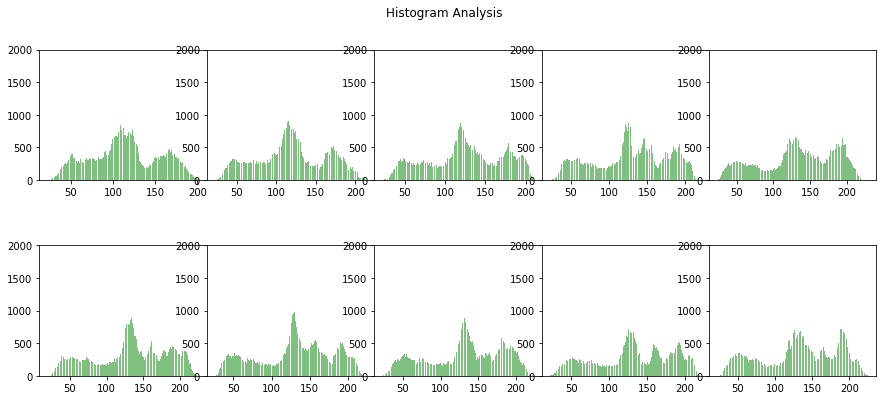

In [44]:
from skimage import io
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
fig.suptitle('Histogram Analysis')
axs = axs.ravel()

for i,img in enumerate(flattened_grouped):
    axs[i].set_ylim([0, 2000])
    #axs[i].hist(img.ravel(), bins = 256, color = 'orange', )
    #axs[i].hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    axs[i].hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    #axs[i].hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)


plt.show()



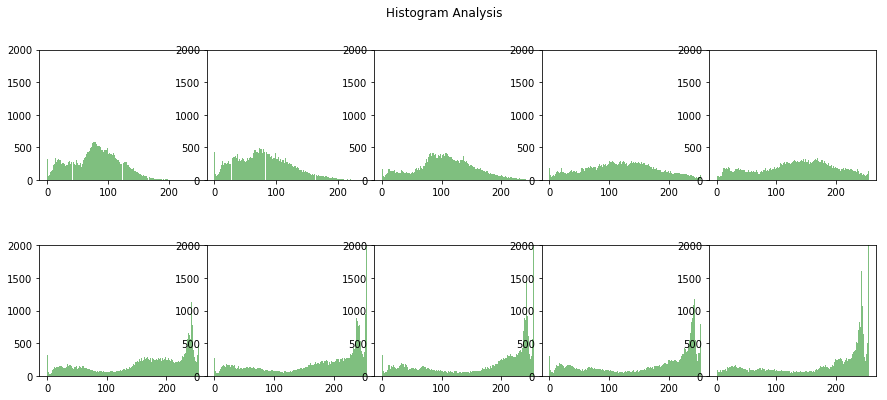

In [39]:
from skimage import io
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
fig.suptitle('Histogram Analysis')
axs = axs.ravel()

for i,img in enumerate(flattened_grouped_pesticide):
    axs[i].set_ylim([0, 2000])
    #axs[i].hist(img.ravel(), bins = 256, color = 'orange', )
    #axs[i].hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    axs[i].hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    #axs[i].hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)


plt.show()
